## MIS780 Advanced AI For Business - Assignment 1 - T2 2021

**Student Name:** _enter your full name here_

**Student ID:** _enter your student ID here_

## Table of Content
   
1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)

 
5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary
 

#### NOTE: all the instructions and hints given in this template should be removed from your final submission. (Including this line)
**Aim:** To clearly articulate your understanding of the bussiness problem to management.

_Define your problem in business term. What is the aim of this probject? What benifit will it generate to the business and its custmers?_

_Present your proposed approaches._

_Present your major findings and explain how they help to address the business problem. Cross-reference with other report sections for support. Do not include chart or tables in this section._

<a id = "cell_exploration"></a>
### 2. Data Exploration

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding of data and report any insights emerging from data analysis

_Process and explore the characteristics of the attributes the provided data set._

_Use table or figure to support answering questions (A), (B) and (C)_


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from datetime import date
import calendar
sns.set_style('ticks')
import nltk 
from nltk import FreqDist
import numpy as np
from itertools import chain

In [22]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIS780/Twitter_Data_VIC.csv',encoding= 'unicode_escape',parse_dates=["Tweet_Time"])
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIS780/Covid19_Cases_VIC.csv',parse_dates=["Date"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
twitter = df1.copy()
covid = df2.copy()

In [24]:
twitter.head()

,User_ID,User_Location,Tweet_ID,Tweet_Time,Tweet_Text,HashTag,Retweet_Count,Like_Count,Source,User_Mentioned,Attachment_URL
0,O007paulchr,sydney australia,1.310000e+18,2020-10-02 05:00:54+00:00,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP,-
1,O007paulchr,sydney australia,1.310000e+18,2020-09-27 06:32:09+00:00,@SkyNewsAust @DanielAndrewsMP @RitaPanahi So w...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @DanielAndrewsMP @RitaPanahi,-
2,O007paulchr,sydney australia,1.310000e+18,2020-09-16 08:32:13+00:00,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP,-
3,O007paulchr,sydney australia,1.300000e+18,2020-09-06 05:45:36+00:00,@SkyNewsAust @DanielAndrewsMP Hay Peta any com...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @DanielAndrewsMP,-
4,O007paulchr,sydney australia,1.300000e+18,2020-09-01 10:41:13+00:00,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim ...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @TimSmithMP @DanielAndrewsMP,-


In [18]:
covid.head()

,Date,VIC
0,25-Jan-20,1
1,26-Jan-20,0
2,27-Jan-20,0
3,28-Jan-20,0
4,29-Jan-20,2


In [7]:
# print info 
print("Shape of the Twitter df is {}.\n".format(twitter.shape))
print("** And dataframe info per below **\n")
print("Null count:", twitter.info(null_counts=True))
twitter['Tweet_Time'] = pd.to_datetime(twitter['Tweet_Time'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)

# check NAs in each column
NA_count = twitter.isna().sum() 

# Percentage of NAs in each column
NA_percent = round((NA_count / len(twitter) * 100),2)
print(NA_percent)
print('\nThere are no columns having NAs ')

Shape of the Twitter df is (129395, 11).

** And dataframe info per below **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129395 entries, 0 to 129394
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   User_ID         129395 non-null  object             
 1   User_Location   129395 non-null  object             
 2   Tweet_ID        129395 non-null  float64            
 3   Tweet_Time      129395 non-null  datetime64[ns, UTC]
 4   Tweet_Text      129395 non-null  object             
 5   HashTag         129395 non-null  object             
 6   Retweet_Count   129395 non-null  object             
 7   Like_Count      129395 non-null  object             
 8   Source          129395 non-null  object             
 9   User_Mentioned  129395 non-null  object             
 10  Attachment_URL  129395 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(9)
mem

**A. How many tweets were posted by month, by days of a week, and by hours of a day? (Hint: generate three figures for this question)**

In [8]:
from datetime import date
import calendar
# Total tweets
print('Total tweets:', len(twitter.index), '\n')

#Tweets were posted by month
tweetbyM = twitter.groupby(twitter['Tweet_Time'].dt.strftime('%B'))['Tweet_Text'].count()
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
tweetbyM = tweetbyM.reindex(month, axis=0)
tweetbyM
print(tweetbyM)

#Tweets were posted by days of a week
tweetbyD = twitter.groupby(twitter['Tweet_Time'].dt.strftime('%A'))['Tweet_Text'].count()
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tweetbyD = tweetbyD.reindex(day, axis=0)
print(tweetbyD)

#Tweets were posted by hour
tweetbyH = twitter.groupby(twitter['Tweet_Time'].dt.strftime('%H'))['Tweet_Text'].count().sort_index()
print(tweetbyH)

Total tweets: 129395 

Tweet_Time
January       1248
February       703
March         3629
April         3427
May           5793
June          6377
July         18184
August       25493
September    41442
October      23099
Name: Tweet_Text, dtype: int64
Tweet_Time
Monday       20049
Tuesday      20234
Wednesday    18274
Thursday     16952
Friday       15009
Saturday     16024
Sunday       22853
Name: Tweet_Text, dtype: int64
Tweet_Time
00    7430
01    8921
02    9571
03    8836
04    7279
05    7496
06    7650
07    7624
08    7882
09    8025
10    7951
11    7141
12    6000
13    3639
14    1745
15     846
16     524
17     407
18     440
19     847
20    1972
21    4136
22    6177
23    6856
Name: Tweet_Text, dtype: int64


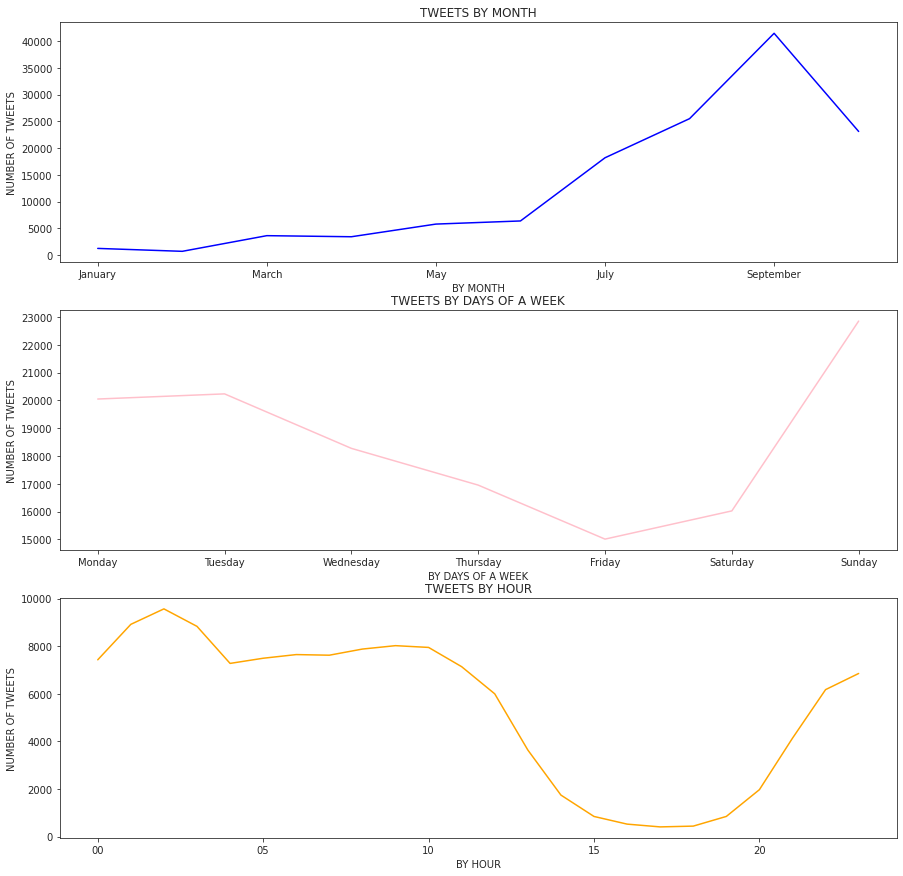

In [ ]:
#Plot
fig, axs = plt.subplots(3,1)
tweetbyM.plot(kind='line',figsize=(15, 15),ax=axs[0],xlabel = "BY MONTH", ylabel = "NUMBER OF TWEETS", rot = 0, title = "TWEETS BY MONTH",color="blue")
tweetbyD.plot(kind='line',figsize=(15, 15),ax=axs[1],xlabel = "BY DAYS OF A WEEK", ylabel = "NUMBER OF TWEETS", rot = 0, title = "TWEETS BY DAYS OF A WEEK",color="pink")
tweetbyH.plot(kind='line',figsize=(15, 15),ax=axs[2],xlabel = "BY HOUR", ylabel = "NUMBER OF TWEETS", title = "TWEETS BY HOUR",color="orange")

**B. What are the (top 10) most popular Hashtags? How did the popularities of those hashtags change according to time (e.g., by month)?**

In [ ]:
#New dataframe with only two attributes "Tweet_Time" and "HashTag"
dfB = twitter[['Tweet_Time', 'HashTag']].copy()
dfB.Tweet_Time = dfB.Tweet_Time.dt.month

# return list from series of comma-separated strings
import numpy as np
from itertools import chain
def chainer(s):
    return list(chain.from_iterable(s.str.split(' ')))

# calculate lengths of splits
lens = dfB.HashTag.str.split(' ').map(len)

# create new dataframe, repeating or chaining as appropriate
dfB = pd.DataFrame({'Tweet_Time': np.repeat(dfB['Tweet_Time'], lens),
                    'HashTag': chainer(dfB['HashTag'])})

#data cleaning: remove values don't have "#"
dfB = dfB[dfB.HashTag.str.contains("#")] 
dfB

,Tweet_Time,HashTag
16,9,#IStandWithDanAndrews
16,9,#IStandWithDan
16,9,#fucktheheraldsun
23,8,#CoateInquiry
23,8,#PAEC
...,...,...
114970,8,#doyouthinkwearestupid
114970,8,#resignnowdan
114970,8,#COVID19Victoria
114972,9,#DictatorDan


The top 10 most popular Hashtags are 
                   WORDS  COUNT
0               #auspol   1915
1        #IStandWithDan   1784
2           #COVID19Vic   1402
3             #springst   1253
4              #COVID19    674
5          #DictatorDan    582
6           #COVID19Aus    416
7      #COVID19Victoria    366
8               #vicpol    344
9  #ResignDanielAndrews    316


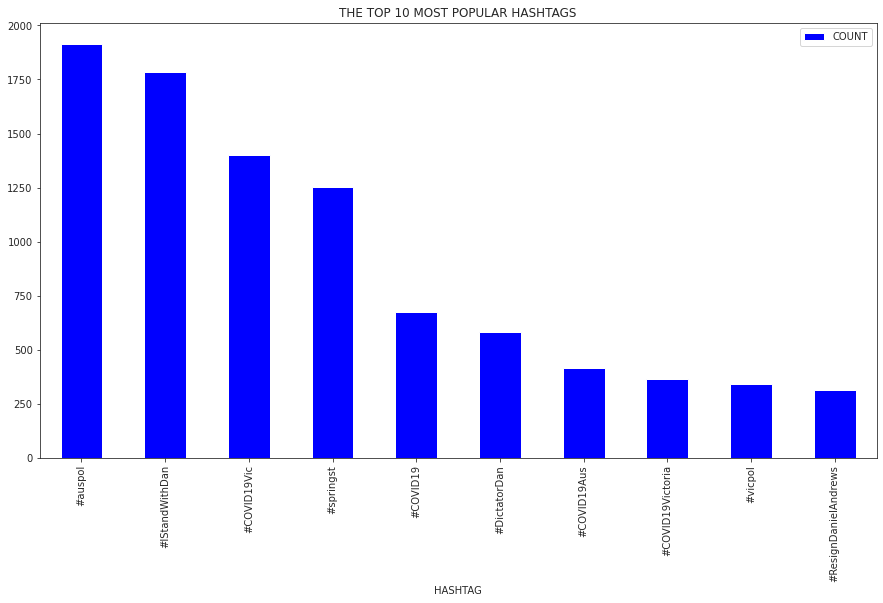

In [ ]:
#Top 10 most popular Hashtags
Top10 = FreqDist(dfB.HashTag).most_common(10)
Top10 = pd.DataFrame(Top10,columns=['WORDS', 'COUNT'])
print("The top 10 most popular Hashtags are \n",Top10)
#plot data
Top10.plot(kind = "bar", xlabel = "HASHTAG", title = "THE TOP 10 MOST POPULAR HASHTAGS", x = "WORDS", y = "COUNT",figsize=(15, 8),color = 'blue')
plt.show()

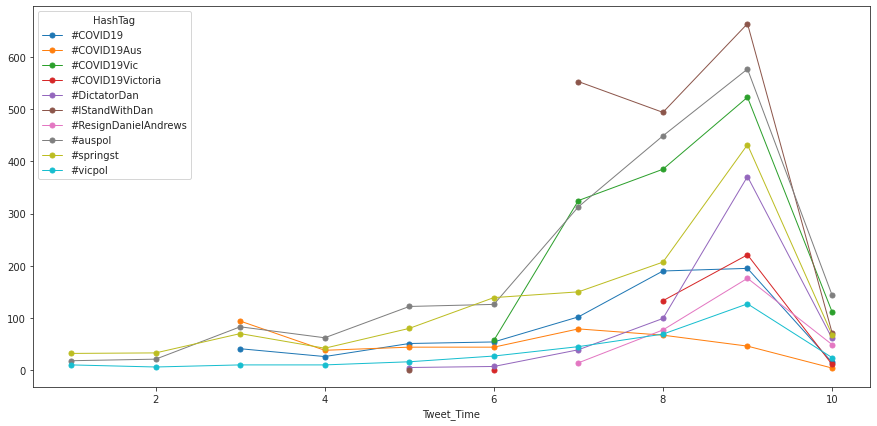

In [ ]:
#Top 10 most popular Hashtags by Month
dfBbyM = dfB[dfB.HashTag.isin(['#auspol', '#IStandWithDan','#COVID19Vic', '#springst','#COVID19','#DictatorDan','#COVID19Aus','#COVID19Victoria','#vicpol','#ResignDanielAndrews'])].copy()
dfBbyM['Counts'] = np.zeros(len(dfBbyM))
# plot all hashtags 
fig, ax = plt.subplots(figsize=(15,7))
dfBbyM.groupby(['Tweet_Time','HashTag']).count()['Counts'].unstack().plot(ax=ax,marker='o', linewidth=1, markersize=5)


HASHTAG COUNT BY MONTH 
 HashTag     #COVID19  #COVID19Aus  #COVID19Vic  ...  #auspol  #springst  #vicpol
Tweet_Time                                      ...                             
1                NaN          NaN          NaN  ...     18.0       32.0     10.0
2                NaN          NaN          NaN  ...     21.0       33.0      6.0
3               41.0         94.0          NaN  ...     83.0       70.0     10.0
4               26.0         38.0          NaN  ...     62.0       42.0     10.0
5               51.0         44.0          NaN  ...    122.0       80.0     16.0
6               54.0         44.0         57.0  ...    126.0      139.0     27.0
7              102.0         79.0        325.0  ...    313.0      150.0     45.0
8              190.0         67.0        385.0  ...    449.0      207.0     69.0
9              195.0         46.0        523.0  ...    577.0      432.0    127.0
10              15.0          4.0        112.0  ...    144.0       68.0     24.0

[1

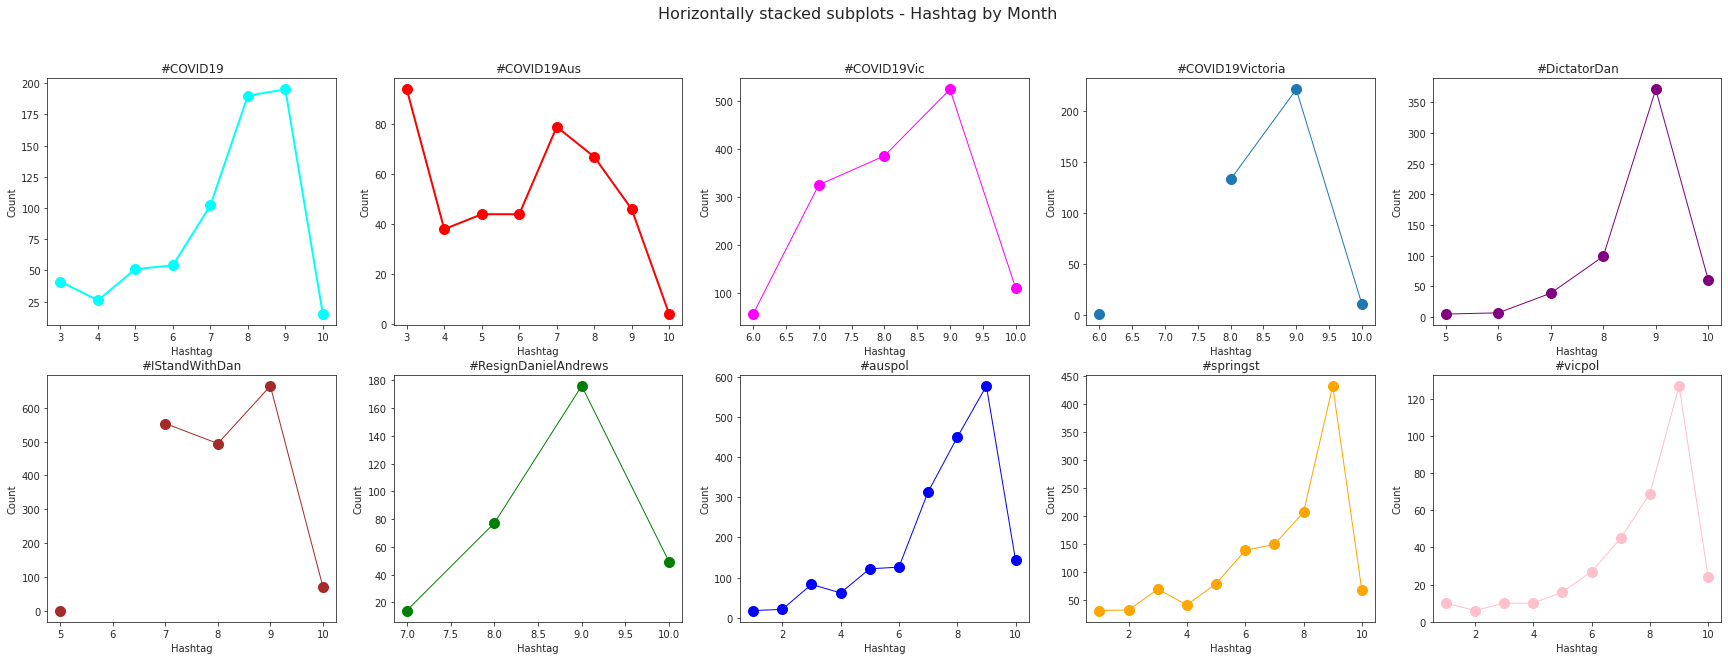

In [ ]:
 #plot each hashtag 
 UnstackeddfBbyM = dfBbyM.groupby(['HashTag','Tweet_Time']).count()['Counts'].unstack(level=0)
 print('HASHTAG COUNT BY MONTH \n', UnstackeddfBbyM, '\n')

#Create a figure with three sub-figures
from matplotlib import pyplot
fig, ax = pyplot.subplots(2, 5, figsize=(30,10))
fig.suptitle('Horizontally stacked subplots - Hashtag by Month', fontsize=16)

#Plot rating for each division in each of the sub-figures
ax[0,0].plot(UnstackeddfBbyM[UnstackeddfBbyM.keys()[0]], 
             color='cyan', marker='o', linewidth=2, markersize=10)
ax[0,0].set_xlabel('Hashtag')
ax[0,0].set_ylabel('Count')
ax[0,0].set_title(UnstackeddfBbyM.keys()[0])

ax[0,1].plot(UnstackeddfBbyM[UnstackeddfBbyM.keys()[1]],
           color='red', marker='o', linewidth=2, markersize=10)
ax[0,1].set_xlabel('Hashtag')
ax[0,1].set_ylabel('Count')
ax[0,1].set_title(UnstackeddfBbyM.keys()[1])

ax[0,2].plot(UnstackeddfBbyM[UnstackeddfBbyM.keys()[2]],
           color='magenta', marker='o', linewidth=1, markersize=10)
ax[0,2].set_xlabel('Hashtag')
ax[0,2].set_ylabel('Count')
ax[0,2].set_title(UnstackeddfBbyM.keys()[2]);

ax[0,3].plot(UnstackeddfBbyM[UnstackeddfBbyM.keys()[3]],
           marker='o', linewidth=1, markersize=10)
ax[0,3].set_xlabel('Hashtag')
ax[0,3].set_ylabel('Count')
ax[0,3].set_title(UnstackeddfBbyM.keys()[3]);

ax[0,4].plot(UnstackeddfBbyM[UnstackeddfBbyM.keys()[4]],
           color='purple', marker='o', linewidth=1, markersize=10)
ax[0,4].set_xlabel('Hashtag')
ax[0,4].set_ylabel('Count')
ax[0,4].set_title(UnstackeddfBbyM.keys()[4]);

ax[1,0].plot(UnstackeddfBbyM[UnstackeddfBbyM.keys()[5]],
           color='brown', marker='o', linewidth=1, markersize=10)
ax[1,0].set_xlabel('Hashtag')
ax[1,0].set_ylabel('Count')
ax[1,0].set_title(UnstackeddfBbyM.keys()[5]);

ax[1,1].plot(UnstackeddfBbyM[UnstackeddfBbyM.keys()[6]],
           color='green', marker='o', linewidth=1, markersize=10)
ax[1,1].set_xlabel('Hashtag')
ax[1,1].set_ylabel('Count')
ax[1,1].set_title(UnstackeddfBbyM.keys()[6]);

ax[1,2].plot(UnstackeddfBbyM[UnstackeddfBbyM.keys()[7]],
           color='blue', marker='o', linewidth=1, markersize=10)
ax[1,2].set_xlabel('Hashtag')
ax[1,2].set_ylabel('Count')
ax[1,2].set_title(UnstackeddfBbyM.keys()[7]);

ax[1,3].plot(UnstackeddfBbyM[UnstackeddfBbyM.keys()[8]],
           color='orange', marker='o', linewidth=1, markersize=10)
ax[1,3].set_xlabel('Hashtag')
ax[1,3].set_ylabel('Count')
ax[1,3].set_title(UnstackeddfBbyM.keys()[8]);

ax[1,4].plot(UnstackeddfBbyM[UnstackeddfBbyM.keys()[9]],
           color='pink', marker='o', linewidth=1, markersize=10)
ax[1,4].set_xlabel('Hashtag')
ax[1,4].set_ylabel('Count')
ax[1,4].set_title(UnstackeddfBbyM.keys()[9]);

**C. What are the (top 10) most popular Twitter’s user account mentioned in the public tweets? Among those Twitter accounts, which accounts belongs to political leaders/government officials? (Hint: visit their official twitter accounts to identify their job title/role)**

In [ ]:
dfC =  twitter[['Tweet_Text', 'User_Mentioned']].copy()
dfC = dfC[dfC.User_Mentioned.str.contains('@')]

def chainer(s):
    return list(chain.from_iterable(s.str.split(' ')))

# calculate lengths of splits
lens = dfC.User_Mentioned.str.split(' ').map(len)

# create new dataframe, repeating or chaining as appropriate
dfC = pd.DataFrame({'Tweet_Text': np.repeat(dfC['Tweet_Text'], lens),
                    'User_Mentioned': chainer(dfC['User_Mentioned'])})

dfC =dfC[dfC.User_Mentioned.str.contains('@')]
dfC

,Tweet_Text,User_Mentioned
0,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,@SkyNewsAust
0,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,@AnnastaciaMP
0,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,@DanielAndrewsMP
1,@SkyNewsAust @DanielAndrewsMP @RitaPanahi So w...,@SkyNewsAust
1,@SkyNewsAust @DanielAndrewsMP @RitaPanahi So w...,@DanielAndrewsMP
...,...,...
114976,"@TomSouthern15 @DanielAndrewsMP Yep, luckily f...",@DanielAndrewsMP
114977,@scorcherzz @DanielAndrewsMP @jamiejanides @ti...,@scorcherzz
114977,@scorcherzz @DanielAndrewsMP @jamiejanides @ti...,@DanielAndrewsMP
114977,@scorcherzz @DanielAndrewsMP @jamiejanides @ti...,@jamiejanides


The top 10 most popular Twitter accounts are 

           ACCOUNTS   COUNT
0  @DanielAndrewsMP  110234
1      @SkyNewsAust    6795
2  @ScottMorrisonMP    5117
3     @VictorianCHO    4180
4     @JennyMikakos    2481
5      @newbury3186    2326
6       @TimSmithMP    2254
7  @michaelobrienmp    1934
8      @rwillingham    1706
9  @rachelbaxendale    1644


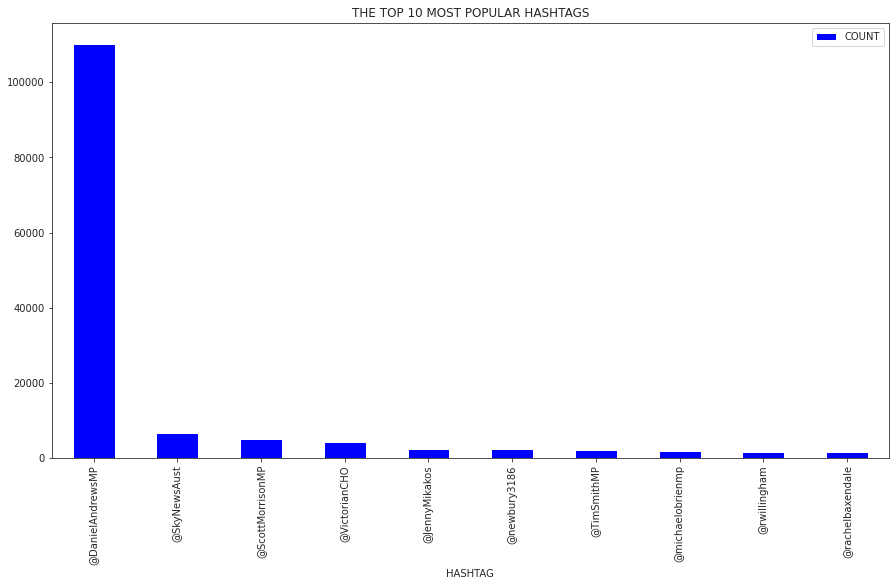

In [ ]:
# Top10account = FreqDist(dfC.User_account).most_common(10) 
Top10account = FreqDist(dfC.User_Mentioned).most_common(10)
Top10account = pd.DataFrame(Top10account,columns=['ACCOUNTS', 'COUNT'])
print("The top 10 most popular Twitter accounts are \n")
print(Top10account)

#plot data: Top 10 most popular Twitter's mentioned user account
Top10account.plot(kind = "bar", xlabel = "HASHTAG", title = "THE TOP 10 MOST POPULAR HASHTAGS", x = "ACCOUNTS", y = "COUNT",figsize=(15, 8), color = 'blue')
plt.show()

In [ ]:
###accounts belongs to politcal leaders/government officials###
# Check string contains these elements 
mylist = ['MP', 'mp', 'CHO','@newbury3186']
pattern = '|'.join(mylist)
PG = Top10account[Top10account.ACCOUNTS.str.contains(pattern)] 
PG
print('After skimming random accounts, we can find that those account having title of political leaders/governement officials includes "MP" or "CHO" at the end of  the account')
print('\nAccounts belongs to politcal leaders/government officials are \n')
print(PG)

After skimming random accounts, we can find that those account having title of political leaders/governement officials includes "MP" or "CHO" at the end of  the account

Accounts belongs to politcal leaders/government officials are 

           ACCOUNTS   COUNT
0  @DanielAndrewsMP  110234
2  @ScottMorrisonMP    5117
3     @VictorianCHO    4180
5      @newbury3186    2326
6       @TimSmithMP    2254
7  @michaelobrienmp    1934


<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in sentiment analysis.

_Use lexicon-based sentiment analysis to answer question (D). (Hint: define a threshold and count how many positive/negative tweets which mentioned the Twitter’s user account of the identified political leaders/government officials)._ 

_Use figure/plot to visualize the overall public sentiments together with the COVID-19 cases to answer question (E)._  


**D. What are public sentiments expressed toward the popularly mentioned political leaders/government officials?**

In [25]:
###CREATE NEW DATAFRAME ####
dfDE = twitter[['Tweet_Time','User_Mentioned','Tweet_Text',]].copy()
dfDE['Month'] = dfDE.Tweet_Time.dt.month
dfDE

,Tweet_Time,User_Mentioned,Tweet_Text,Month
0,2020-10-02 05:00:54+00:00,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,10
1,2020-09-27 06:32:09+00:00,@SkyNewsAust @DanielAndrewsMP @RitaPanahi,@SkyNewsAust @DanielAndrewsMP @RitaPanahi So w...,9
2,2020-09-16 08:32:13+00:00,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP...,9
3,2020-09-06 05:45:36+00:00,@SkyNewsAust @DanielAndrewsMP,@SkyNewsAust @DanielAndrewsMP Hay Peta any com...,9
4,2020-09-01 10:41:13+00:00,@SkyNewsAust @TimSmithMP @DanielAndrewsMP,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim ...,9
...,...,...,...,...
129390,2020-10-06 17:39:52+00:00,-,@BouchCristine @DaveBeaini @sumeyyailanbey @Da...,10
129391,2020-10-06 17:24:34+00:00,-,@EChambers94 @DanielAndrewsMP Ok ms ratchet. Y...,10
129392,2020-10-06 16:59:58+00:00,-,@DanielAndrewsMP \n@VicGovAu \n@VicGovernor \n...,10
129393,2020-10-06 16:55:00+00:00,-,@NoPlease__ @PRGuy17 It doesnt fit their narr...,10


In [ ]:
# ######CLEANING DATA #####
# import re
# from bs4 import BeautifulSoup
# from nltk.tokenize import WordPunctTokenizer
# tok = WordPunctTokenizer()


# def tweet_cleaner(text):
#     soup = BeautifulSoup(text, 'lxml') #remove html
#     souped = soup.get_text() #remove html
    
#     stripped = re.sub("@[A-Za-z0-9_]+","", text) #remove mention @
#     stripped1 = re.sub("#[A-Za-z0-9_]+","", stripped) # remove hashtag #
#     stripped2 = re.sub(r'(https?)\S+', '', stripped1) #remove http, https
  
#     letters_only = re.sub("[^a-zA-Z]", " ", stripped2) # keep only text, remove all symbols
#     lower_case = letters_only.lower() #lower case all text
#     words = tok.tokenize(lower_case) # tokenize all text to words to clear blank spaces
#     return (" ".join(words)).strip() # then rejoin all words again

In [ ]:
# testing = dfDE.Tweet_Text
# test_result = []
# for t in testing:
#     test_result.append(tweet_cleaner(t))
# test_result

['what a stupid statement he can t be serious',
 'so what would you have done rita so quick to jump on andrews but no solutions or alternatives pathetic lineral commentary as usual',
 'what a load of bs luckily michael o brien wasn t in charge',
 'hay peta any comments on the current liberal federal government no what a waste of space you are',
 'tim who',
 'i m interested to know who paul murray is recommending to lead the state and do everything sky news expects of that person',
 'idiot',
 'so what chris let people die another sky headline',
 'why does every sky news commentator continue to bash daniel andrews not one of them could do his job day after day pathetic',
 'crap he is doing a hundred times better than your lot would',
 'political point scoring pathetic',
 'credibility',
 'go fuck yourself we are in a pandemic is thankfully in charge if you lot had any say we would be like us now',
 'making a curry',
 '',
 'no they are not us based trolls',
 '',
 'love it',
 'amen',
 'i do

In [ ]:
# #rejoin the dataframe 
# dfDE['Cleaned_Text']=pd.DataFrame(test_result)
# dfDE 

,Tweet_Time,User_Mentioned,Tweet_Text,Cleaned_Text
0,2020-10-02 05:00:54+00:00,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,what a stupid statement he can t be serious
1,2020-09-27 06:32:09+00:00,@SkyNewsAust @DanielAndrewsMP @RitaPanahi,@SkyNewsAust @DanielAndrewsMP @RitaPanahi So w...,so what would you have done rita so quick to j...
2,2020-09-16 08:32:13+00:00,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP...,what a load of bs luckily michael o brien wasn...
3,2020-09-06 05:45:36+00:00,@SkyNewsAust @DanielAndrewsMP,@SkyNewsAust @DanielAndrewsMP Hay Peta any com...,hay peta any comments on the current liberal f...
4,2020-09-01 10:41:13+00:00,@SkyNewsAust @TimSmithMP @DanielAndrewsMP,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim ...,tim who
...,...,...,...,...
129390,2020-10-06 17:39:52+00:00,-,@BouchCristine @DaveBeaini @sumeyyailanbey @Da...,no she didn t she was dismissed shut down mid ...
129391,2020-10-06 17:24:34+00:00,-,@EChambers94 @DanielAndrewsMP Ok ms ratchet. Y...,ok ms ratchet you got empathy heart and it s a...
129392,2020-10-06 16:59:58+00:00,-,@DanielAndrewsMP \n@VicGovAu \n@VicGovernor \n...,the buck stops with me
129393,2020-10-06 16:55:00+00:00,-,@NoPlease__ @PRGuy17 It doesnt fit their narr...,it doesn t fit their narrative of blaming for ...


In [26]:
#download package for sentiment analysis 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [27]:
####Calculate the sentiment####
dfsen = dfDE
analyzer = SentimentIntensityAnalyzer() 
dfsen['neg'] = [analyzer.polarity_scores(x)['neg'] for x in dfsen.Tweet_Text]
dfsen['neu'] = [analyzer.polarity_scores(x)['neu'] for x in dfsen.Tweet_Text]
dfsen['pos'] = [analyzer.polarity_scores(x)['pos'] for x in dfsen.Tweet_Text]
dfsen['compound'] = [analyzer.polarity_scores(x)['compound'] for x in dfsen.Tweet_Text]
dfsen['rating'] = np.where(dfsen['compound']>= 0, 'Positve', 'Negative')
dfsen

,Tweet_Time,User_Mentioned,Tweet_Text,Month,neg,neu,pos,compound,rating
0,2020-10-02 05:00:54+00:00,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,10,0.370,0.630,0.000,-0.5719,Negative
1,2020-09-27 06:32:09+00:00,@SkyNewsAust @DanielAndrewsMP @RitaPanahi,@SkyNewsAust @DanielAndrewsMP @RitaPanahi So w...,9,0.239,0.699,0.062,-0.7783,Negative
2,2020-09-16 08:32:13+00:00,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP...,9,0.000,0.784,0.216,0.5106,Positve
3,2020-09-06 05:45:36+00:00,@SkyNewsAust @DanielAndrewsMP,@SkyNewsAust @DanielAndrewsMP Hay Peta any com...,9,0.227,0.773,0.000,-0.6124,Negative
4,2020-09-01 10:41:13+00:00,@SkyNewsAust @TimSmithMP @DanielAndrewsMP,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim ...,9,0.000,1.000,0.000,0.0000,Positve
...,...,...,...,...,...,...,...,...,...
129390,2020-10-06 17:39:52+00:00,-,@BouchCristine @DaveBeaini @sumeyyailanbey @Da...,10,0.108,0.666,0.226,0.6757,Positve
129391,2020-10-06 17:24:34+00:00,-,@EChambers94 @DanielAndrewsMP Ok ms ratchet. Y...,10,0.197,0.678,0.125,-0.3384,Negative
129392,2020-10-06 16:59:58+00:00,-,@DanielAndrewsMP \n@VicGovAu \n@VicGovernor \n...,10,0.167,0.833,0.000,-0.1531,Negative
129393,2020-10-06 16:55:00+00:00,-,@NoPlease__ @PRGuy17 It doesnt fit their narr...,10,0.362,0.510,0.128,-0.6808,Negative


In [28]:
#####Split to individual account#####
def chainer(s):
    return list(chain.from_iterable(s.str.split(' ')))

# calculate lengths of splits
lens = dfsen.User_Mentioned.str.split(' ').map(len)

# create new dataframe, repeating or chaining as appropriate
dfD = pd.DataFrame({'User_account': chainer(dfsen['User_Mentioned']),
                    'Tweet_Text': np.repeat(dfsen['Tweet_Text'], lens),
                    'sentiment': np.repeat(dfsen['rating'],lens),
                    'compound': np.repeat(dfsen['compound'],lens),
                    'neg': np.repeat(dfsen['neg'],lens),
                    'neu': np.repeat(dfsen['neu'],lens),
                    'pos': np.repeat(dfsen['pos'],lens)})

mylist = ['@DanielAndrewsMP', '@ScottMorrisonMP', '@VictorianCHO', 'newbury3186', '@TimSmithMP', '@michaelobrienmp']
pattern = '|'.join(mylist)
dfD = dfD[dfD.User_account.str.contains(pattern)] 
print('\nTwitter Post by the popularly mentioned political leaders/government officials are \n')
dfD 


Twitter Post by the popularly mentioned political leaders/government officials are 



,User_account,Tweet_Text,sentiment,compound,neg,neu,pos
0,@DanielAndrewsMP,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,Negative,-0.5719,0.370,0.630,0.000
1,@DanielAndrewsMP,@SkyNewsAust @DanielAndrewsMP @RitaPanahi So w...,Negative,-0.7783,0.239,0.699,0.062
2,@michaelobrienmp,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP...,Positve,0.5106,0.000,0.784,0.216
2,@DanielAndrewsMP,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP...,Positve,0.5106,0.000,0.784,0.216
3,@DanielAndrewsMP,@SkyNewsAust @DanielAndrewsMP Hay Peta any com...,Negative,-0.6124,0.227,0.773,0.000
...,...,...,...,...,...,...,...
114973,@DanielAndrewsMP,@DanielAndrewsMP \nYou have led a sham governm...,Negative,-0.9245,0.304,0.696,0.000
114974,@DanielAndrewsMP,"@DanielAndrewsMP \nHi Dan,\nI live in outer ea...",Positve,0.4215,0.120,0.727,0.153
114975,@DanielAndrewsMP,@DanielAndrewsMP @JennyMikakos \nStuck in our ...,Negative,-0.7707,0.201,0.744,0.055
114976,@DanielAndrewsMP,"@TomSouthern15 @DanielAndrewsMP Yep, luckily f...",Positve,0.9245,0.000,0.652,0.348


In [29]:
#####Public sentiments expressed toward the popularly mentioned political leaders/government officials#####
dfDgroup = dfD[['User_account','sentiment']].copy()
dfDgroup['Counts'] = np.zeros(len(dfDgroup))
UnstackeddfDgroup = dfDgroup.groupby(['sentiment','User_account']).count()['Counts'].unstack(level=0)
print('USER ACCOUNTS COUNT BY SENTIMENT \n')
UnstackeddfDgroup

USER ACCOUNTS COUNT BY SENTIMENT 



sentiment,Negative,Positve
User_account,,
@DanielAndrewsMP,39642,70592
@ScottMorrisonMP,1779,3338
@TimSmithMP,897,1357
@VictorianCHO,1322,2858
@michaelobrienmp,711,1223
@newbury3186,905,1421


**E. How did the overall public sentiments change in relation to the Covid-19 cases in Victoria? Does the increase/decrease in the number of COVID-19 influence public sentiments?**

In [48]:
#Prepare Covid dataframe 
covid['Month'] = covid.Date.dt.month
dfEcovid = covid[['Month','VIC']].copy()
dfEcovid = dfEcovid.groupby('Month')['VIC'].count()

#Prepare Sentiment dataframe 
dfESen = dfsen[['Month','rating']].copy()
dfESen['Count'] = np.zeros(len(dfESen))
dfESen = dfESen.groupby(['rating','Month']).count()['Count'].unstack(level=0)

#Merge two dataframe by Month
dfE = pd.merge(left = dfESen, right = dfEcovid, how ="left", left_on = 'Month', right_on='Month')
dfE

,Negative,Positve,VIC
Month,,,
1,504,744,7
2,265,438,29
3,1070,2559,31
4,1132,2295,30
5,1791,4002,31
6,2402,3975,30
7,6791,11393,31
8,9797,15696,31
9,14934,26508,30


<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in topic modeling.

_Use text-processing techniques to process and prepare textual data for topic modelling._ 

_Use LDA to explore topics discussed in the text reviews._ 

_Carry out experiments and demonstrate how an appropriate topic number is determined for your model._


_Interpret the discovered topics and answer question (F). (Hints: use only nouns (e.g., virus, vaccine, policies, home, school) to generate your model, any word that does not have a proper meaning can be removed. Given the large-scale of the data set, the number of optimal topics can be high.)._

_Compute and visualize the distributions of the topics relating to COVID-19 in relation to time (e.g., weeks, fortnights, or months) to answer question (G)._ 


In [28]:
import nltk
nltk.download('stopwords')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
dfFG = dfsen[['Month','Tweet_Text']].copy() 
dfFG

,Month,Tweet_Text
0,10,"@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP What a stupid statement, he cant be serious."
1,9,"@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual."
2,9,"@SkyNewsAust @michaelobrienmp @DanielAndrewsMP What a load of BS, luckily Michael OBrien wasnt in charge."
3,9,"@SkyNewsAust @DanielAndrewsMP Hay Peta any comments on the current liberal federal government, no. What a waste of space you are."
4,9,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim who?
...,...,...
129390,10,@BouchCristine @DaveBeaini @sumeyyailanbey @DanielAndrewsMP No she didnt. \nShe was dismissed shut down mid sentence ignored but @sumeyyailanbey did a great job today. As always 
129391,10,@EChambers94 @DanielAndrewsMP Ok ms ratchet. You got empathy heart and it s all fake cause that while sentencing is so ignorant for such times. No his doing wonderful. IV seen all the nurses and...
129392,10,@DanielAndrewsMP \n@VicGovAu \n@VicGovernor \nThe buck stops with me. https://t.co/IDDS7Ip5Xe
129393,10,@NoPlease__ @PRGuy17 It doesnt fit their narrative of blaming @DanielAndrewsMP for every death.


In [2]:
text = 'RT @SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, http://m so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.'

In [91]:
text1 = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(^RT\s+)',"", text)
text1

'   So what would you have done Rita  so quick to jump on Andrews but no solutions or alternatives Pathetic Lineral commentary as usual'

In [82]:
text2 = re.sub(r'^RT\s+', '', text)
text2

'@SkyNewsAust @DanielAndrewsMP @RitaPanahi So what would you have done Rita, so quick to jump on Andrews but no solutions or alternatives. Pathetic Lineral commentary as usual.'

In [18]:
import nltk
nltk.download('punkt')
word = nltk.word_tokenize("RT @SkyNewsAust @DanielAndrewsMP @RitaPanahi So what covid would you have done to the government so quick to jump on Andrews #covid19 http://")
tags = nltk.pos_tag(word)
tags
# nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
# nouns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('RT', 'NNP'),
 ('@', 'NNP'),
 ('SkyNewsAust', 'NNP'),
 ('@', 'NNP'),
 ('DanielAndrewsMP', 'NNP'),
 ('@', 'NNP'),
 ('RitaPanahi', 'NNP'),
 ('So', 'NNP'),
 ('what', 'WP'),
 ('covid', 'NN'),
 ('would', 'MD'),
 ('you', 'PRP'),
 ('have', 'VB'),
 ('done', 'VBN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('government', 'NN'),
 ('so', 'RB'),
 ('quick', 'JJ'),
 ('to', 'TO'),
 ('jump', 'VB'),
 ('on', 'IN'),
 ('Andrews', 'NNP'),
 ('#', '#'),
 ('covid19', 'NN'),
 ('http', 'NN'),
 (':', ':'),
 ('//', 'NN')]

In [30]:
from nltk.stem import PorterStemmer #Stemming Package  
import re  #Regular expression operation package

porter = PorterStemmer()

documents = dfFG['Tweet_Text']
Cleaned_doc = []
for r in range(len(documents)):
    Tweet_Text = documents[r]
    try:
        #remove @account, hashtag, http, RT , # symbol
        Tweet_Text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(^RT\s+)","", Tweet_Text)
        # make all text lowercase
        Tweet_Text = Tweet_Text.lower()
        # apply tokenization
        Tokens = Tweet_Text.split()
        #keep noun
        tags = nltk.pos_tag(Tokens)
        Tweet_Text = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
        # apply stemming operation (Optional)
        #for t in range(len(Tokens)):
        #    Tokens[t] = porter.stem(Tokens[t])
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3] 
        Tweet_Text = ' '.join(Filtered_token)        
    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(Tweet_Text)  
    print('-[Review Text]: ', Tweet_Text)

Streaming output truncated to the last 5000 lines.
-[Review Text]:  dimo never seen such incompetent government needs leadership lessons from
-[Review Text]:  keep pushing this grub till comes clean liars lowest
-[Review Text]:  
-[Review Text]:  tickets
-[Review Text]:  soulless
-[Review Text]:  said ultimately accountable needs apologize people victoria prove that apology sincere stepping down
-[Review Text]:  that figure around 18th people have died result failed hotel quarantine contact tracing mismanagement labor celebrates
-[Review Text]:  except dead simply because they cannot speak more
-[Review Text]:  fucking hole ground
-[Review Text]:  that just
-[Review Text]:  fowler1 istandwithdan people have stokholmsyndrome
-[Review Text]:  
-[Review Text]:  dont even place dollar melbourne would have farm that weeks
-[Review Text]:  what exactly happened 4200 mystery cases where these resolved wiped anyone shed light this
-[Review Text]:  know
-[Review Text]:  istandwithdan people hav

In [31]:
import nltk 
#### can not use this code:  from nltk.corpus import stopwords
nltk.download('stopwords') # or # python -m nltk.downloader stopwords
stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item) 
    print('-[Cleaned Text]: ', Cleaned_doc[r])

Streaming output truncated to the last 5000 lines.
-[Cleaned Text]:  dimo never seen incompetent government needs leadership lessons
-[Cleaned Text]:  keep pushing grub till comes clean liars lowest
-[Cleaned Text]:  
-[Cleaned Text]:  tickets
-[Cleaned Text]:  soulless
-[Cleaned Text]:  said ultimately accountable needs apologize people victoria prove apology sincere stepping
-[Cleaned Text]:  figure around 18th people died result failed hotel quarantine contact tracing mismanagement labor celebrates
-[Cleaned Text]:  except dead simply cannot speak
-[Cleaned Text]:  fucking hole ground
-[Cleaned Text]:  
-[Cleaned Text]:  fowler1 istandwithdan people stokholmsyndrome
-[Cleaned Text]:  
-[Cleaned Text]:  dont even place dollar melbourne would farm weeks
-[Cleaned Text]:  exactly happened 4200 mystery cases resolved wiped anyone shed light
-[Cleaned Text]:  know
-[Cleaned Text]:  istandwithdan people stokholmsyndrome
-[Cleaned Text]:  istandwithdan people stokholmsyndrome
-[Cleaned Tex

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features= 1000, # keep top 1000 terms 
                             max_df = 0.5, 
                             smooth_idf=True)

A = vectorizer.fit_transform(Cleaned_doc)
A.shape # check shape of the document-term matrix

(129395, 1000)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

<129395x62567 sparse matrix of type '<class 'numpy.int64'>'
	with 1340551 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


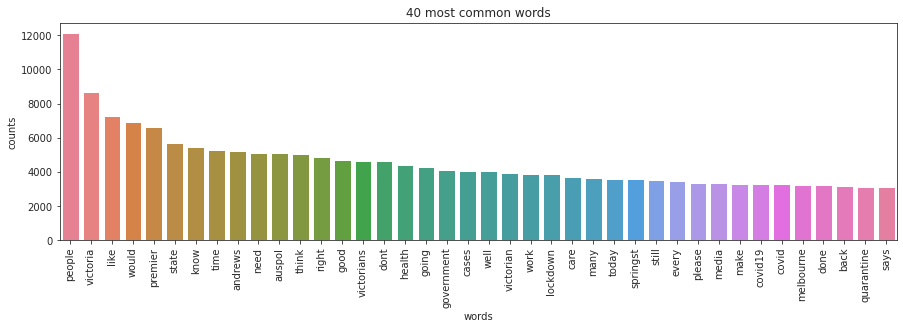

In [34]:
terms = count_vectorizer.get_feature_names()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words
    
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
    
plt.figure(2, figsize=(15, 4))
plt.subplot(title='40 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [41]:
#Remove highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 1000 and total_counts[t] > 50:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  3417


<129395x3417 sparse matrix of type '<class 'numpy.int64'>'
	with 644710 stored elements in Compressed Sparse Row format>

In [43]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[1.13093459e-03 9.79356783e-05 1.49933999e-06 ... 9.59849186e-06
  2.29371844e-04 6.11106453e-05]
 [1.89502251e-06 7.05515995e-06 1.28821431e-06 ... 5.52426558e-05
  1.29602918e-03 1.22795578e-04]
 [9.88123342e-05 1.04072571e-03 1.62815048e-06 ... 1.59864182e-04
  3.99219490e-04 1.94038114e-05]
 ...
 [1.46520673e-04 1.63648980e-05 1.48286588e-06 ... 3.44846444e-06
  2.35428380e-04 3.15091098e-04]
 [9.24754098e-05 1.50041889e-06 1.49973866e-06 ... 1.16323045e-04
  7.36345406e-04 2.28178014e-05]
 [3.58288873e-05 1.18378283e-04 5.82661494e-05 ... 7.39510799e-05
  1.62632383e-03 1.06289471e-04]]


In [51]:
 ###Display topic and top words
 for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\n✨Topic %d✨" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


✨Topic 0✨
dictator : 0.006
failed : 0.006
leaders : 0.006
strategy : 0.005
gets : 0.005
protest : 0.005
wear : 0.005
check : 0.005
chairman : 0.004
change : 0.004

✨Topic 1✨
mask : 0.008
wearing : 0.006
sense : 0.005
leave : 0.005
risk : 0.005
house : 0.005
closed : 0.004
bring : 0.004
thousands : 0.004
golf : 0.004

✨Topic 2✨
guards : 0.011
exactly : 0.008
tough : 0.006
understand : 0.006
list : 0.006
failure : 0.006
shut : 0.006
full : 0.005
workers : 0.005
step : 0.005

✨Topic 3✨
stand : 0.009
yeah : 0.008
matter : 0.006
mental : 0.006
number : 0.006
looking : 0.005
looks : 0.005
though : 0.005
break : 0.005
heard : 0.005

✨Topic 4✨
pretty : 0.008
ruby : 0.008
remember : 0.008
princess : 0.008
thinks : 0.007
currently : 0.006
lies : 0.006
hospital : 0.006
local : 0.006
straight : 0.005

✨Topic 5✨
rather : 0.008
fuck : 0.007
credlin : 0.006
todays : 0.006
high : 0.006
normal : 0.005
court : 0.005
australians : 0.005
thisisnotjournalism : 0.005
money : 0.005

✨Topic 6✨
imagine : 0.01

In [53]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords 

,1000,10000,100000,1000s,100s,1159pm,11am,1336,1500,18th,1987a,1996,19th,2000,20000,2018,2019,2020,2021,2022,2352,289the,3000,3810,4200,5000,518everything,60mins,7880,7news,9news,abandon,abbey,abbott,abc730,ability,able,aboriginal,absence,absolute,...,words,worked,worker,workers,workforce,workman,workplace,workplaces,works,worldwide,worried,worries,worry,worrying,worse,worst,worth,wouldnt,wouldve,write,writing,written,wrote,wuhan,xmas,yarra,yeah,yell,yesterday,york,youd,youi,youll,young,youso,youth,youve,zealand,zero,zoom
0,0.001131,0.000098,0.000001,0.000125,0.000055,0.000002,0.000064,0.000001,0.000003,0.000002,0.000047,0.000001,0.000135,0.000044,0.000129,0.000401,0.000259,0.000090,0.000037,0.000002,0.001590,0.001516,0.000032,0.000001,0.000001,0.000077,0.000001,0.000001,0.000001,0.001444,0.000109,0.000784,0.000001,0.000526,0.000172,0.000217,0.000334,0.000220,0.000001,0.001477,...,0.002056,0.000838,0.000343,0.001003,0.000005,0.000001,0.000009,0.000372,0.000399,0.000173,0.000246,0.000004,0.001583,0.000052,0.000349,0.000457,0.002513,0.000837,0.000045,0.000035,0.000009,0.000374,0.000174,0.000107,0.000002,0.000406,0.000856,0.000004,0.001429,0.000001,0.000075,0.000001,0.000033,0.002298,0.000877,0.000018,0.000051,0.000010,0.000229,0.000061
1,0.000002,0.000007,0.000001,0.000099,0.000001,0.000127,0.000223,0.000001,0.000047,0.000074,0.000014,0.000001,0.000636,0.000001,0.000013,0.000084,0.000089,0.000815,0.000570,0.000061,0.000001,0.000001,0.000020,0.000001,0.000001,0.000063,0.000001,0.000001,0.000001,0.000209,0.000002,0.000001,0.000001,0.000003,0.000009,0.000347,0.001702,0.000001,0.000628,0.001250,...,0.000316,0.000680,0.000116,0.000591,0.000011,0.000001,0.000048,0.000002,0.000718,0.000022,0.000463,0.000002,0.000525,0.000005,0.000813,0.000961,0.000295,0.000791,0.000432,0.000111,0.000120,0.000001,0.000001,0.000048,0.000166,0.000060,0.002087,0.000017,0.003915,0.000007,0.000077,0.000001,0.000310,0.000017,0.000001,0.000001,0.000309,0.000055,0.001296,0.000123
2,0.000099,0.001041,0.000002,0.000004,0.000003,0.000002,0.000079,0.000002,0.000005,0.000018,0.000025,0.000002,0.000092,0.000035,0.000002,0.000018,0.000369,0.000769,0.000002,0.000323,0.000002,0.000002,0.000286,0.000002,0.000002,0.000080,0.000002,0.000057,0.000002,0.000002,0.000049,0.000002,0.000002,0.000127,0.000377,0.000109,0.000565,0.000089,0.000004,0.000341,...,0.000453,0.000341,0.000320,0.005104,0.000157,0.000002,0.000322,0.000107,0.000463,0.000002,0.000004,0.000002,0.000082,0.000004,0.000157,0.000230,0.000493,0.000263,0.000004,0.000038,0.000091,0.000155,0.000214,0.000007,0.000002,0.000005,0.000363,0.000002,0.000357,0.001868,0.000578,0.000002,0.000314,0.000101,0.000002,0.000006,0.000234,0.000160,0.000399,0.000019
3,0.000160,0.000074,0.000277,0.000132,0.000104,0.000817,0.000443,0.000002,0.000049,0.000090,0.000034,0.000002,0.000048,0.000193,0.000002,0.000023,0.000237,0.000117,0.000248,0.000002,0.000002,0.000002,0.000005,0.000002,0.000002,0.000445,0.000002,0.000029,0.000002,0.000682,0.000204,0.000002,0.000002,0.000007,0.000002,0.000144,0.001196,0.000047,0.000002,0.000749,...,0.003526,0.000619,0.000311,0.001919,0.000670,0.000002,0.000341,0.000072,0.001355,0.000034,0.000667,0.000007,0.000226,0.000023,0.000763,0.000016,0.000402,0.001465,0.000070,0.000074,0.000402,0.000259,0.000295,0.000005,0.000024,0.000019,0.008073,0.000002,0.000704,0.000002,0.000074,0.000002,0.000205,0.002204,0.000002,0.000699,0.000186,0.000236,0.000031,0.000132
4,0.000004,0.000004,0.000051,0.000008,0.000042,0.000033,0.000002,0.000002,0.000015,0.000002,0.001785,0.000002,0.000027,0.000003,0.000004,0.000065,0.000022,0.001791,0.000187,0.000010,0.000002,0.000002,0.000013,0.000002,0.000002,0.000007,0.000002,0.000002,0.000002,0.000048,0.000667,0.000002,0.000002,0.000005,0.000003,0.000192,0.002159,0.000002,0.000010,0.000547,...,0.000193,0.000159,0.000023,0.000179,0.000684,0.000002,0.000037,0.000002,0.000746,0.000051,0.000084,0.000002,0.000574,0.000002,0.000715,0.000846,0.000029,0.000683,0.000063,0.000004,0.000302,0.000005,0.00

**Mallet Library**

In [55]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'
!pip install little_mallet_wrapper
!pip install seaborn
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

In [61]:
###Process Tweets###
test = dfFG
test['Tweet_Text'] = test['Tweet_Text'].astype(str)
training_data = [little_mallet_wrapper.process_string(Tweet_Text, numbers='remove') for text in test['Tweet_Text']]
original_tweets = [title for title in test['Tweet_Text']]

In [62]:
####Get Dataset Statistics####
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 129395
Mean Number of Words per Document: 9.0
Vocabulary Size: 9


In [ ]:
#Set Number of Topics
num_topics = 35
#Set training data
training_data = training_data
#Set Other MALLET File Paths

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

**Aim:** To apply analytics result in addressing practical business problem.

_Based on the discovered insights from your analysis, provide specific recommendation to Victorian Government, and suggest what they can do to improve resident’s well-being._

### References: 

_List references to other materials that you used for this assignment here_